<a href="https://colab.research.google.com/github/sileeee/Python-DataScience-Study/blob/master/datascience_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression
선형회귀란 종속변수 y와 독립변수 X의 상관관계가 선형으로 설명되는 회귀 분석.
매우 복잡한 상황에서는 정확성이 떨어지는 한계가 있다.

## 파이썬 코드로 선형회귀 식 찾는 방법
먼저 오차를 구하는 방법을 정의하고, 여러 식을 테스트하여 그 중 가장 오차가 적은 식을 선별
- 선으로 부터 데이터까지 거리 제곱의 합이 오차입니다. 수많은 식을 그려보고 이 오차 합이 가장 적은 식을 고르면 된다.
- 파이썬으로 이러한 단순 반복 작업을 대신한다.

# Visualization 연습하기
- 워싱턴 King 카운티의 집 값 예측하기
https://www.kaggle.com/harlfoxem/housesalesprediction

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('./sample_data/house.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


< 데이터 특징 살펴보기 >

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


< 필요없는 특징 없애기 >

In [10]:
house_data = df.drop(['id', 'date'], axis=1)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 상관계수 
- 변수와 변수의 관련성을 수치화
## 피어슨 상관계수
- 두 변수의 선형적 상관관계를 표현


< 피어슨계수 히트맵으로 시각화하기 >

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

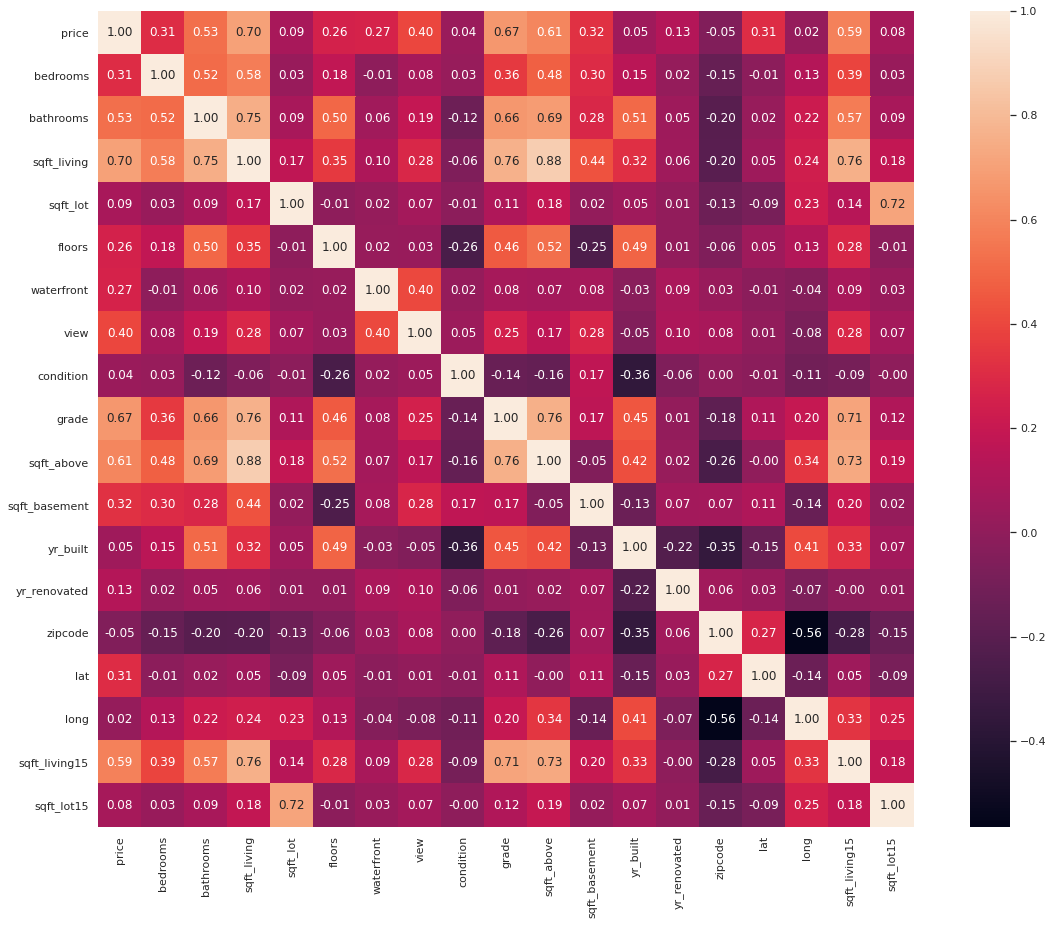

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(house_data.corr(), annot=True, fmt='.2f', square=True)

plt.show()

< catplot으로 산포도 시각화하기 >

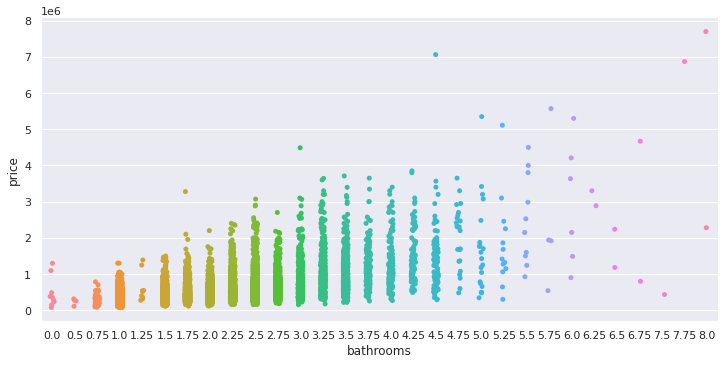

In [13]:
sns.catplot(data=house_data, x='bathrooms', y='price', aspect=2)

< 특징의 범위 파악하기 >

In [14]:
house_data['sqft_living'].max()

13540

In [15]:
house_data['price'].max()

7700000.0

< 집 값의 범위 알기 >

In [16]:
print('집값 최솟값은?', house_data['price'].min())
print('집값 최댓값은?', house_data['price'].max())
print('집값 평균값은?', house_data['price'].mean())

집값 최솟값은? 75000.0
집값 최댓값은? 7700000.0
집값 평균값은? 540088.1417665294


< 거주면적에 따른 가격 분포도 >

In [ ]:
sns.catplot(data=house_data, x='sqft_living', y='price').set(ylim=(0, 5000000))

< 박스 플롯 >

In [ ]:
sns.catplot(kind='box', data=house_data, x='grade', y='price', aspect=2)

# Scikit-learn으로 Linear Regression 구현

##data set 구성 계획
모든 데이터를 8:2로 나누고 8 부분을 다시 8:2로 나누어, training set, validation set, test set을 구성한다. 보유하고 있는 데이터는 총 21,613개다.
training set만으로 여러 종류의 모델을 학습하고 validation set으로 각 모델의 성능을 측정할 예정이다. test set은 건드리지 않는다.
최종적으로 21,613개 중 64%를 Training set으로, 16%를 Validation set으로 남은 20%를 Test set으로 구성하였다. train set 13,832개, valid set 3,458개, test set 4,323개

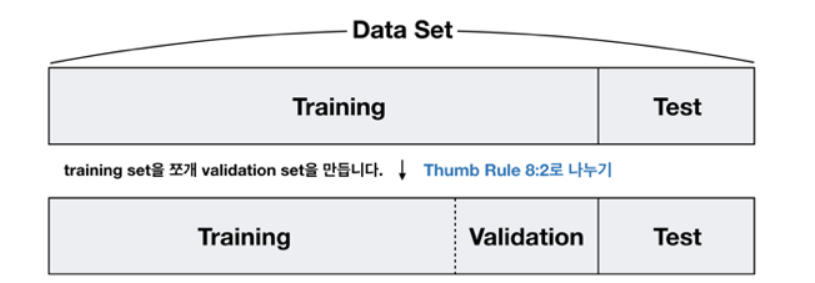

현재 모든 데이터를 house_data라는 변수에 가지고 있다. 위와 같은 계획에 따라 데이터를 나눠주려고 할 때 다음과 같은 3단계를 거쳐야 한다.
훈련용 특징 부분과 정답부분(레이블)로 나누기 train_data와 target_data로 나눠진다.
80%를 training set으로 나머지 20%를 test set으로 나눠준다. training set(x_train, y_train)과 test set(x_test, y_test)로 나눠진다.
training set을 다시 8:2로 나누어 training set과 validation set을 구성한다. training set(x_train, y_train)과 validation set(x_valid, y_valid)로 나눠지며 최종적으로 training set, validation set, test set을 가지게 된다.

* 참고
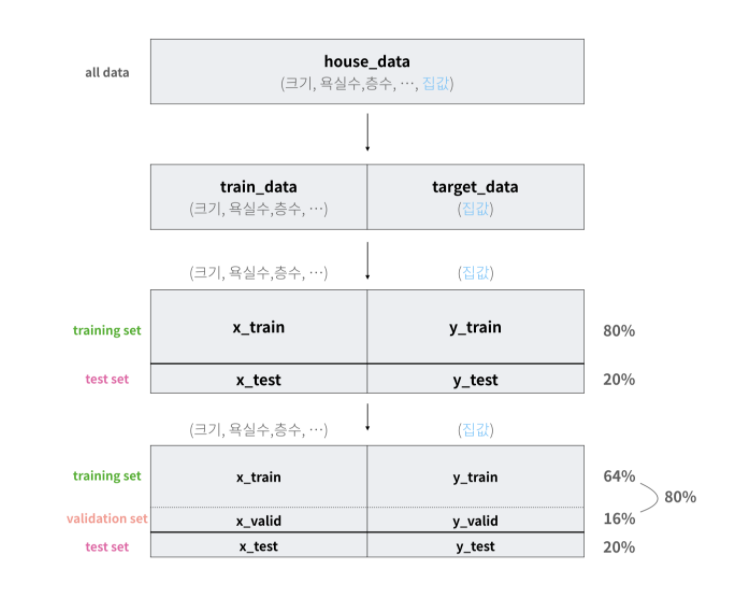

특히 x는 훈련용 특징 부분의 데이터, y는 정답부분(레이블)을 가리킨다

- 데이터 셋 구성하기


In [19]:
from sklearn.model_selection import train_test_split

train_data = house_data.drop(['price'], axis=1)
target_data = house_data[['price']]

#train : test set을 8 : 2로 나눠줍니다.
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2)

#다시 train set을 8:2로 나눠 validation set을 만들어줍니다.
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2) 

print('모든 데이터', train_data.shape)
print('training set', x_train.shape, y_train.shape)
print('validation set', x_valid.shape, y_valid.shape)
print('test set', x_test.shape, y_test.shape)

모든 데이터 (21613, 18)
training set (13832, 18) (13832, 1)
validation set (3458, 18) (3458, 1)
test set (4323, 18) (4323, 1)


### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train)

print("train set score:", lr.score(x_train, y_train))
print("valid set score:", lr.score(x_valid, y_valid))

train set score: 0.705211141041955
valid set score: 0.7078129167793286


### Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2),
                      LinearRegression()).fit(x_train, y_train)

print("train set score:", model.score(x_train, y_train))
print("valid set score:", model.score(x_valid, y_valid))

train set score: 0.832888942284082
valid set score: 0.8249669175218525


#### Polynomial Features가 3인 모델 만들기

In [22]:
model = make_pipeline(PolynomialFeatures(3), LinearRegression()).fit(x_train, y_train)

print("train set score:", model.score(x_train, y_train))
print("valid set score:", model.score(x_valid, y_valid))


train set score: 0.8805747094180132
valid set score: 0.7298365465608294


In [23]:
model.predict(x_train)

array([[382983.32384205],
       [413434.47123241],
       [395233.65404892],
       ...,
       [308921.3572731 ],
       [395499.12017536],
       [974736.99321079]])

### Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(x_train, y_train)

print("train set score:", tree.score(x_train, y_train))
print("valid set score:", tree.score(x_valid, y_valid))

train set score: 0.9994943348398182
valid set score: 0.7136537526908615


### 여러 모델을 그래프로 표현하기

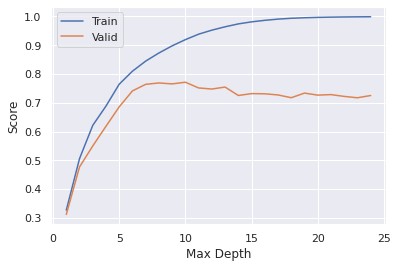

In [25]:
train_score = []
valid_score = []
depth_range = range(1, 25)
for depth in depth_range:
    tree = DecisionTreeRegressor(max_depth=depth).fit(x_train, y_train)
    
    train_score.append(tree.score(x_train, y_train))
    valid_score.append(tree.score(x_valid, y_valid))
    
plt.plot(depth_range, train_score)
plt.plot(depth_range, valid_score)

plt.legend(['Train', 'Valid'])

plt.xlabel('Max Depth')
plt.ylabel('Score')

plt.show()

# Feature Scaling과 성능 개선

### Feature Scaling
Feature Scaling은 특징 값의 범위를 균일하게 맞춰주는 작업

집값 분석에서 몇개의 특징을 살펴보면,
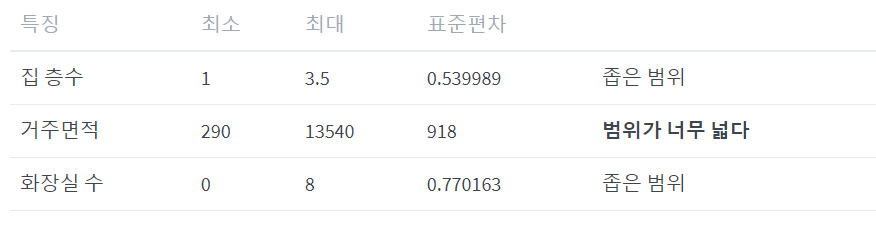

두 특징값의 범위가 너무 크게 차이가 나다보니 이런 고민이 생기기 시작한다.
우리가 scikit-learn으로 학습을 시작하면,
모델이 거주면적과 집 층수를 같은 비중으로 생각하고 학습할까?
모델에 따라 다르지만, 일반적으로 특징의 범위가 크게 다르면 모델은 각 특징의 중요성을 오인하기 마련이다.
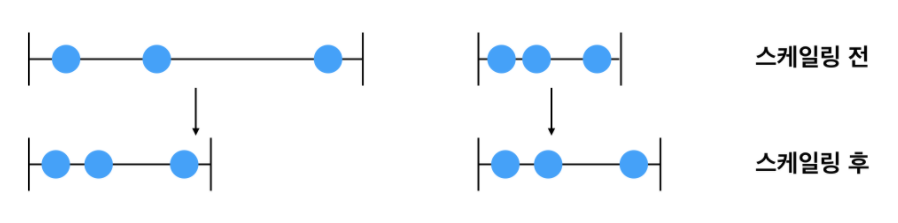

- 수학적 원리에 따라 스케일링 한다.

특징의 데이터 폭이 너무 좁거나 너무 넓은 데이터를 적당한 범위로 조정해준다.

## StandardScaler 적용하기

### feature scaling 적용하기

In [30]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

xs_train = scalar.fit_transform(x_train)
xs_train = pd.DataFrame(xs_train, columns=x_train.columns)

ys_train = scalar.fit_transform(y_train)
ys_train = pd.DataFrame(ys_train, columns=y_train.columns)

xs_valid = scalar.fit_transform(x_valid)
xs_valid = pd.DataFrame(xs_valid, columns=x_valid.columns)

ys_valid = scalar.fit_transform(y_valid)
ys_valid = pd.DataFrame(ys_valid, columns=y_valid.columns)

- feature scaling 방법에는 여러가지 방법이 있다. StandardScaler는 정규분포에 속성을 이용한 방식

### feature scaling 적용된 결과 살펴보기

In [31]:
xs_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04
mean,-2.179912e-16,3.322964e-17,-1.173311e-16,1.928764e-17,4.355330e-16,5.486903e-16,-4.014525e-16,8.563614e-16,7.761608e-17,3.667300e-17,1.102172e-15,-3.567852e-15,5.031360e-16,-7.257647e-14,4.989878e-15,3.616419e-14,-5.987756e-17,-3.526836e-17
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00
min,-3.696952e+00,-2.736977e+00,-1.851465e+00,-3.661375e-01,-9.145419e-01,-8.490532e-02,-3.022090e-01,-3.700622e+00,-3.947137e+00,-1.706660e+00,-6.607568e-01,-2.449404e+00,-2.149687e-01,-1.438118e+00,-2.916005e+00,-2.144155e+00,-2.316713e+00,-4.707967e-01
25%,-4.066846e-01,-4.759574e-01,-7.078231e-01,-2.482091e-01,-9.145419e-01,-8.490532e-02,-3.022090e-01,-6.282649e-01,-5.658499e-01,-7.101157e-01,-6.607568e-01,-6.615911e-01,-2.149687e-01,-8.393571e-01,-6.451520e-01,-8.052040e-01,-7.253451e-01,-2.929107e-01
50%,-4.066846e-01,1.700482e-01,-1.899475e-01,-1.812743e-01,1.016158e-02,-8.490532e-02,-3.022090e-01,-6.282649e-01,-5.658499e-01,-2.778796e-01,-6.607568e-01,1.291724e-01,-2.149687e-01,-2.405965e-01,8.778194e-02,-1.143626e-01,-2.148239e-01,-1.915677e-01
75%,6.900713e-01,4.930509e-01,5.113423e-01,-9.936369e-02,9.348651e-01,-8.490532e-02,-3.022090e-01,9.079134e-01,2.794720e-01,5.025467e-01,6.176255e-01,8.855549e-01,-2.149687e-01,7.323896e-01,8.522380e-01,6.263334e-01,5.436648e-01,-9.257854e-02
max,8.367362e+00,7.599112e+00,1.235775e+01,3.001017e+01,3.708976e+00,1.177783e+01,4.962469e+00,2.444092e+00,4.506082e+00,9.147268e+00,1.014942e+01,1.504413e+00,4.698522e+00,2.266714e+00,1.563377e+00,6.402338e+00,6.159398e+00,2.196356e+01


In [32]:
ys_train.describe()

,price
count,1.383200e+04
mean,6.701084e-17
std,1.000036e+00
min,-1.247522e+00
25%,-5.999060e-01
50%,-2.476463e-01
75%,2.942713e-01
max,1.939760e+01


## Polynomial Regression

### Linear Regression with Feature Scaling

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(xs_train, ys_train)

print("train set score:", lr.score(xs_train, ys_train))
print("valid set score:", lr.score(xs_valid, ys_valid))

train set score: 0.705211141041955
valid set score: 0.706058800323644


### Polynomial Regression with Feature Scaling

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2), LinearRegression()).fit(xs_train, ys_train)

print("train set score:", model.score(xs_train, ys_train))
print("valid set score:", model.score(xs_valid, ys_valid))

train set score: 0.8332483384714202
valid set score: -1.415716645963576e+17


### Ridge - PolynomialFeatures(2)

In [38]:
from sklearn.linear_model import Ridge

model = make_pipeline(PolynomialFeatures(2), Ridge(alpha=0.1)).fit(xs_train, ys_train)

print("train set score:", model.score(xs_train, ys_train))
print("valid set score:", model.score(xs_valid, ys_valid))

train set score: 0.8332439935291825
valid set score: 0.8103392176547388


### Ridge - PolynomialFeatures(3)

In [39]:
from sklearn.linear_model import Ridge

model = make_pipeline(PolynomialFeatures(3), Ridge(alpha=1500)).fit(xs_train, ys_train)

print("train set score:", model.score(xs_train, ys_train))
print("valid set score:", model.score(xs_valid, ys_valid))

train set score: 0.8895184105927
valid set score: 0.8379577300374109


- Ridge

decision tree의 복잡도를 낮춰 overfitting 문제를 해결하는데 자주 사용된다.

### Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(xs_train, ys_train)

print("train set score:", tree.score(xs_train, ys_train))
print("valid set score:", tree.score(xs_valid, ys_valid))

train set score: 0.9994943345619715
valid set score: 0.6944722163866989


### 여러 모델을 그래프로 표현

ValueError: ignored

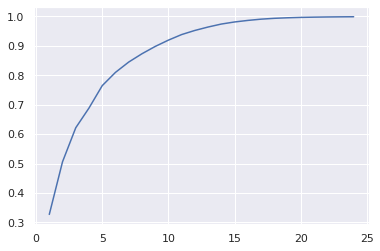

In [42]:
train_score = []
valid_scroe = []
depth_range = range(1, 25)
for depth in depth_range:
  tree = DecisionTreeRegressor(max_depth=depth).fit(xs_train, ys_train)

  train_score.append(tree.score(xs_train, ys_train))
  valid_score.append(tree.score(xs_valid, ys_valid))

plt.plot(depth_range, train_score)
plt.plot(depth_range, valid_score)

plt.legend(['Train', 'Valid'])

plt.xlabel('Max Depth')
plt.ylabel('Score')

plt.show()